<a href="https://colab.research.google.com/github/raphaelgoncalves/UNICAMP-DataSci4Health-Projeto-Final/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória

#### Neste documento, realizaremos a primeira análise exploratória dos dados brutos extraidos do DataSus, já com os dados limpos.

## Importação das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose

## Importação e Visualização dos dados.

### Internações de Influenza no SUS entre 2015 e 2020 na faixa etária de 0 a 4 anos

In [ ]:
internacao = 'https://raw.githubusercontent.com/raphaelgoncalves/UNICAMP-DataSci4Health-Projeto-Final/main/Data/interim/teste_6_datas.csv'

df = pd.read_csv(internacao)
df


,data,faixa0a4
0,2015-01,351
1,2015-02,332
2,2015-03,751
3,2015-04,800
4,2015-05,746
...,...,...
67,2020-08,194
68,2020-09,143
69,2020-10,132
70,2020-11,171


###Conversões de data

In [ ]:
df.data = pd.to_datetime(df.data)

df

,data,faixa0a4
0,2015-01-01,351
1,2015-02-01,332
2,2015-03-01,751
3,2015-04-01,800
4,2015-05-01,746
...,...,...
67,2020-08-01,194
68,2020-09-01,143
69,2020-10-01,132
70,2020-11-01,171


### Gráfico da Série Temporal

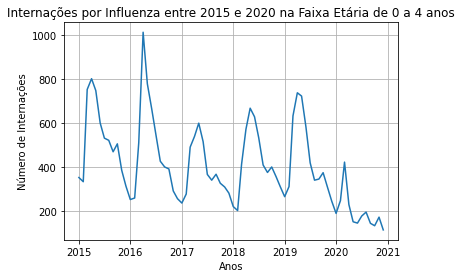

In [ ]:
plt.plot_date(df.data,df.faixa0a4, fmt='-')
plt.xlabel("Anos")
plt.ylabel("Número de Internações")
plt.title("Internações por Influenza entre 2015 e 2020 na Faixa Etária de 0 a 4 anos")
plt.grid()
plt.show()

### Separação dos anos em DataFrames para análises estatísticas individuais.

In [ ]:
df2015 = df.loc[0:11, :]
df2016 = df.loc[12:23,:]
df2017 = df.loc[24:35,:]
df2018 = df.loc[36:47,:]
df2019 = df.loc[48:59,:]
df2020 = df.loc[60:71,:]


### Gráficos por Ano

#### 2015 e 2016

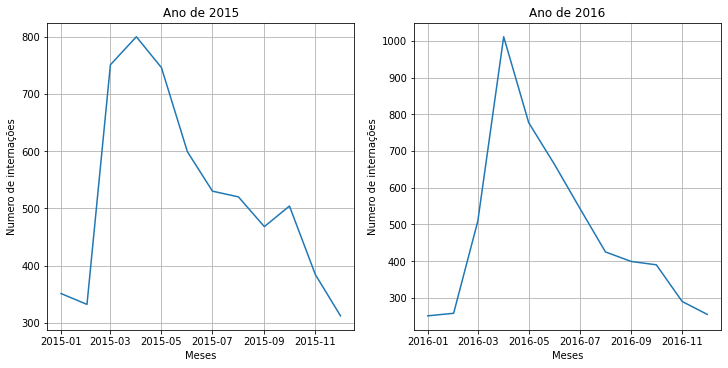

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), constrained_layout=True)

ax1.plot_date(df2015.data,df2015.faixa0a4, fmt='-')
ax1.set_title('Ano de 2015')
ax1.set_ylabel('Numero de internações')
ax1.set_xlabel('Meses')
ax1.grid()

ax2.plot_date(df2016.data,df2016.faixa0a4, fmt='-')
ax2.set_title('Ano de 2016')
ax2.set_ylabel('Numero de internações')
ax2.set_xlabel('Meses')
ax2.grid()


#### 2017 e 2018

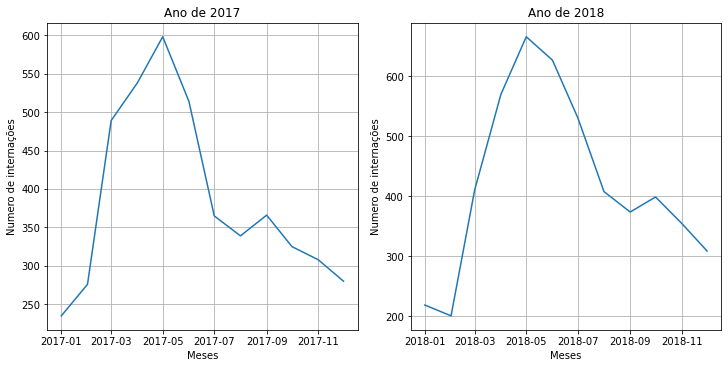

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), constrained_layout=True)

ax1.plot_date(df2017.data,df2017.faixa0a4, fmt='-')
ax1.set_title('Ano de 2017')
ax1.set_ylabel('Numero de internações')
ax1.set_xlabel('Meses')
ax1.grid()

ax2.plot_date(df2018.data,df2018.faixa0a4, fmt='-')
ax2.set_title('Ano de 2018')
ax2.set_ylabel('Numero de internações')
ax2.set_xlabel('Meses')
ax2.grid()

#### 2019 e 2020

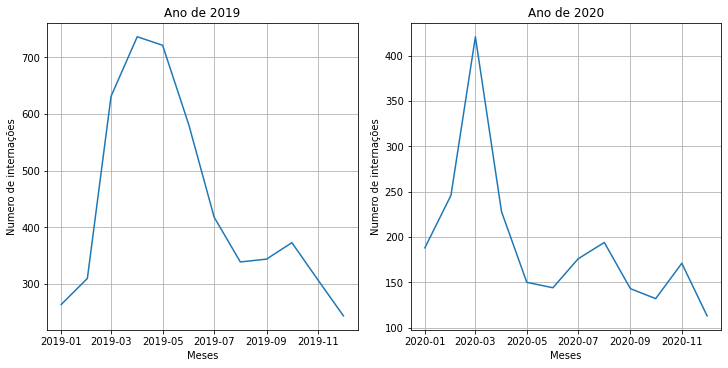

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), constrained_layout=True)

ax1.plot_date(df2019.data,df2019.faixa0a4, fmt='-')
ax1.set_title('Ano de 2019')
ax1.set_ylabel('Numero de internações')
ax1.set_xlabel('Meses')
ax1.grid()

ax2.plot_date(df2020.data,df2020.faixa0a4, fmt='-')
ax2.set_title('Ano de 2020')
ax2.set_ylabel('Numero de internações')
ax2.set_xlabel('Meses')
ax2.grid()

## Estatística básica  



### Teste de Normalidade Shapiro-Wilk 

In [ ]:
print('O resultado do teste de normalidade Shapiro-Wilk de 2015 é:',stats.shapiro(df2015.faixa0a4))
print('O resultado do teste de normalidade Shapiro-Wilk de 2016 é:',stats.shapiro(df2016.faixa0a4))
print('O resultado do teste de normalidade Shapiro-Wilk de 2017 é:',stats.shapiro(df2017.faixa0a4))
print('O resultado do teste de normalidade Shapiro-Wilk de 2018 é:',stats.shapiro(df2018.faixa0a4))
print('O resultado do teste de normalidade Shapiro-Wilk de 2019 é:',stats.shapiro(df2019.faixa0a4))
print('O resultado do teste de normalidade Shapiro-Wilk de 2020 é:',stats.shapiro(df2020.faixa0a4))

O resultado do teste de normalidade Shapiro-Wilk de 2015 é: (0.916672945022583, 0.259541779756546)
O resultado do teste de normalidade Shapiro-Wilk de 2016 é: (0.8832786083221436, 0.09655812382698059)
O resultado do teste de normalidade Shapiro-Wilk de 2017 é: (0.9084237813949585, 0.20364071428775787)
O resultado do teste de normalidade Shapiro-Wilk de 2018 é: (0.9495514035224915, 0.6304358839988708)
O resultado do teste de normalidade Shapiro-Wilk de 2019 é: (0.8565542697906494, 0.044272761791944504)
O resultado do teste de normalidade Shapiro-Wilk de 2020 é: (0.7692136764526367, 0.00427332753315568)


### Decomposição da Série temporal para estudo de tendência, sazonalidade e residual

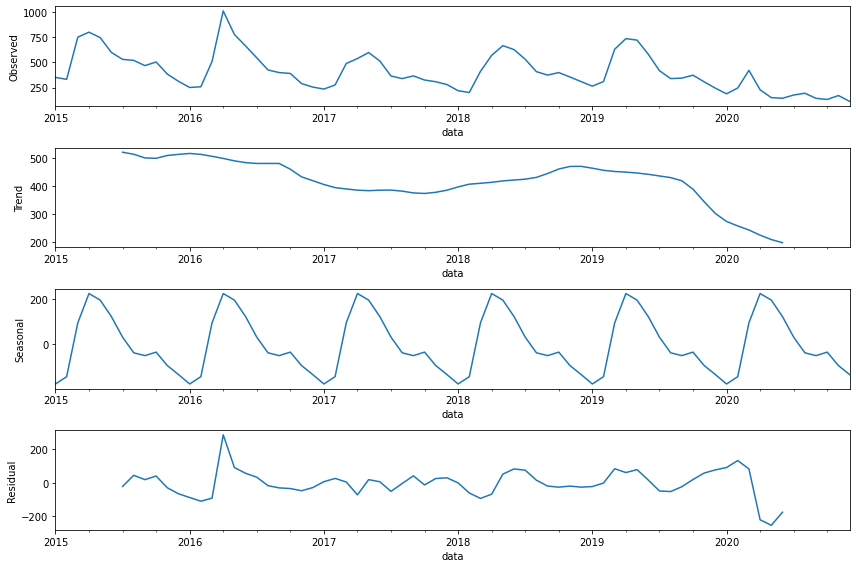

In [ ]:
df.index = df.data

result = seasonal_decompose(df.faixa0a4, model='additive')

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1, ylabel="Observed" )
result.trend.plot(ax=ax2, ylabel="Trend")
result.seasonal.plot(ax=ax3, ylabel="Seasonal")
result.resid.plot(ax=ax4, ylabel="Residual")
plt.tight_layout()





### Gráfico de Autocorrelação

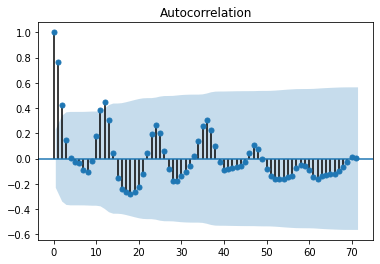

In [ ]:
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(df.faixa0a4, lags=71)

plt.show()

(0.0, 72.0)

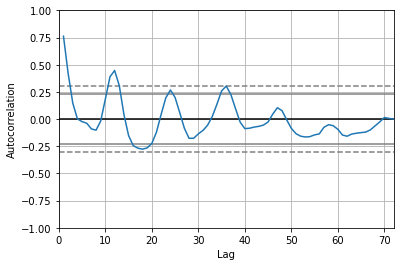

In [ ]:
from pandas.plotting import autocorrelation_plot


ax = autocorrelation_plot(df.faixa0a4)
ax.set_xlim([0, 72])



In [ ]:
from statsmodels.stats.stattools import durbin_watson
  
gfg = durbin_watson(df.faixa0a4)
  
print(gfg)

0.07771312408595606
